<a href="https://colab.research.google.com/github/Sohini3073/credit-card-fraud-detection-ml/blob/main/Creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 💳 CREDIT CARD FRAUD DETECTION - ADVANCED ML PROJECT

### Step 1️⃣: Import libraries


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score,
                             precision_recall_curve,
                             roc_curve)

from imblearn.over_sampling import SMOTE

### Step 2️⃣: Load dataset

In [10]:
data = pd.read_csv("/content/Creditcard.csv")
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Step 3️⃣: Basic EDA


Missing values per column:
 0

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


/tmp/ipython-input-1063465547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=data, palette="coolwarm")


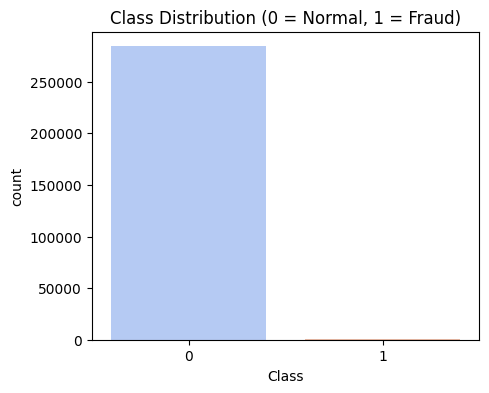

In [11]:
print("\nMissing values per column:\n", data.isnull().sum().max())
print("\nClass distribution:\n", data["Class"].value_counts())

# Plot class imbalance
plt.figure(figsize=(5,4))
sns.countplot(x="Class", data=data, palette="coolwarm")
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

### Step 4️⃣: Feature scaling

In [12]:
scaler = StandardScaler()
data["Amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))

# Drop the Time column (not important)
data = data.drop(["Time"], axis=1)

### Step 5️⃣: Split data

In [13]:
X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (227845, 29)
Testing data shape: (56962, 29)


### Step 6️⃣: Handle imbalance using SMOTE

In [14]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("\nBefore SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())



Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


### Step 7️⃣: Model Training

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_res, y_res)

### Step 8️⃣: Model Evaluation

In [ ]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Step 9️⃣: ROC Curve & Precision-Recall Curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.show()

### Step 🔟: Feature Importance

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align="center", color="teal")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 10 Important Features")
plt.show()

### Step 11: Save Model

In [ ]:
import pickle
with open("fraud_model.pkl", "wb") as f:
    pickle.dump(rf, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nModel and scaler saved successfully!")

### Streamlit interface

In [ ]:
!pip install flask streamlit pyngrok


In [ ]:
%%writefile fraud_app.py
from flask import Flask, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

# Load model and scaler
model = pickle.load(open("fraud_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    df = pd.DataFrame([data])
    df["Amount"] = scaler.transform(df[["Amount"]])
    pred = model.predict(df)[0]
    prob = model.predict_proba(df)[0][1]
    return jsonify({"fraud": int(pred), "probability": float(prob)})

if __name__ == "__main__":
    app.run(port=5000)


In [ ]:
!python fraud_app.py


In [ ]:
import requests

data = {
    "V1": -1.2,
    "V2": 0.5,
    "V3": 2.0,
    "Amount": 250
}

response = requests.post("http://127.0.0.1:5000/predict", json=data)
print(response.json())
